# Astropy tutorial: putting it all together

In this tutorial we'll learn how to use some of the features of `astropy` as well as the `astroquery` library.

## Astroquery: Simbad
`astroquery` is a handy python library for accessing information from the online **Simbad** and **Vizier** databases.

Let's first load the **Simbad** interface and send a query for your favorite object.

In [1]:
from astroquery.simbad import Simbad
import astropy.units as u

In [2]:
result = Simbad.query_object("Barnard's Star")
result

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object
NAME Barnard's star,17 57 48.4997,+04 41 36.111,14,14,0.223,0.304,90,A,O,2018yCat.1345....0G


In [3]:
type(result)

astropy.table.table.Table

You'll see that this query returns an object with several columns but a single row. This object is in fact an `astropy.table` object. To access columns in this table, you can use the following commands.

In [4]:
result[0].columns

<TableColumns names=('MAIN_ID','RA','DEC','RA_PREC','DEC_PREC','COO_ERR_MAJA','COO_ERR_MINA','COO_ERR_ANGLE','COO_QUAL','COO_WAVELENGTH','COO_BIBCODE')>

In [5]:
result[0]["RA"], result[0]["DEC"]

('17 57 48.4997', '+04 41 36.111')

Exercise: Use the RA and Dec columns from the table to create a SkyCoord object

In [6]:
from astropy.coordinates import SkyCoord

In [7]:
SkyCoord(ra=result[0]["RA"], dec=result[0]["DEC"], unit=(u.hourangle, u.deg))


<SkyCoord (ICRS): (ra, dec) in deg
    (269.45208208, 4.69336417)>

## Astroquery: Vizier
Let's import the `Vizier` module from `astroquery`.

In [8]:
from astroquery.vizier import Vizier

Exercise: Use the `find_catalogs` method from `Vizier` to search for the GAIA DR2 catalog.

In [9]:
print(Vizier.find_catalogs("GAIA DR2"))

OrderedDict([('I/345', </>), ('I/347', </>), ('I/348', </>), ('IV/35', </>), ('IV/36', </>), ('J/A+A/616/A12', </>), ('J/A+A/616/A37', </>), ('J/A+A/616/L2', </>), ('J/A+A/616/L15', </>), ('J/A+A/617/A135', </>), ('J/A+A/618/A44', </>), ('J/A+A/618/A56', </>), ('J/A+A/618/A93', </>), ('J/A+A/619/A8', </>), ('J/A+A/619/A106', </>), ('J/A+A/619/A155', </>), ('J/A+A/619/A180', </>), ('J/A+A/619/L8', </>), ('J/A+A/620/A91', </>), ('J/A+A/620/A128', </>), ('J/A+A/620/A141', </>), ('J/A+A/620/A155', </>), ('J/A+A/620/A172', </>), ('J/A+A/621/A38', </>), ('J/A+A/621/A48', </>), ('J/A+A/621/L2', </>), ('J/A+A/621/L3', </>), ('J/A+A/622/A60', </>), ('J/A+A/622/A165', </>), ('J/A+A/622/L13', </>), ('J/A+A/623/A22', </>), ('J/A+A/623/A25', </>), ('J/AJ/156/94', </>), ('J/MNRAS/482/4570', </>), ('J/MNRAS/482/5138', </>), ('J/MNRAS/484/2832', </>)])


This query returns many catalogs that use the GAIA DR2 data. The catalog we are interested is I/345.

Exercise: Use the `Vizier.query_region` method to query the GAIA DR2 catalog (I/345) for objects within 0.1 degrees around Barnard's Star.

In [10]:
result = Vizier.query_region("Barnard's Star", radius=0.1*u.deg, catalog="I/345")
result

TableList with 2 tables:
	'0:I/345/gaia2' with 32 column(s) and 50 row(s) 
	'1:I/345/rvstdcat' with 32 column(s) and 1 row(s) 

You will see that this query returned two results, the gaia2 catalog, as well as the catalog with radial velocity standards. At this point we are only interested in the first catalog. Unfortunately, the first catalog only has 50 rows, because this is the `Vizier` standard. To remove this limit, set `Vizier.ROW_LIMIT = -1`. Be aware that this may mean you will be downloading a large amount of data. Rerun the query with the new limit.

In [11]:
Vizier.ROW_LIMIT = -1
result = Vizier.query_region("Barnard's Star", radius=0.1*u.deg, catalog="I/345/gaia2")
result

TableList with 1 tables:
	'0:I/345/gaia2' with 32 column(s) and 2336 row(s) 

This result contains the following columns:

In [12]:
data = result[0]
data.columns

<TableColumns names=('RA_ICRS','e_RA_ICRS','DE_ICRS','e_DE_ICRS','Source','Plx','e_Plx','pmRA','e_pmRA','pmDE','e_pmDE','Dup','FG','e_FG','Gmag','e_Gmag','FBP','e_FBP','BPmag','e_BPmag','FRP','e_FRP','RPmag','e_RPmag','BP-RP','RV','e_RV','Teff','AG','E_BP-RP_','Rad','Lum')>

A cool feature of this table is that it contains information about the unit of each column.

In [13]:
print(data["RA_ICRS"].unit)
print(data["pmRA"].unit)

deg
mas / yr


Exercise: use the RA and DEC columns to define `SkyCoord` objects for the entire table, now using the table units.

In [14]:
columns = data["RA_ICRS"], data["DE_ICRS"]
p = SkyCoord(ra=columns[0], dec=columns[1], frame="icrs", unit=(columns[0].unit, columns[1].unit))

Exercise: Use these coordinates to make a map of the sky using the sizes of the markes to denote the brightness of these stars. Tips: use the size in `plt.scatter` to change the marker sizes, use the `Gmag` column for magnitudes and convert them to size $r$ using $r=r_\mathrm{max}+(r_\mathrm{min}-r_\mathrm{max})(M-M_\mathrm{min})/(M_\mathrm{max}-M_\mathrm{min})$. Good values for this exercise are $M_\mathrm{min}=5$, $M_\mathrm{max}=20$, $r_\mathrm{min}=1$ and $r_\mathrm{max}=200$.

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
mag = data["Gmag"]
minmag, maxmag = 5, 20
minrad, maxrad = 1, 200
rad = maxrad+(minrad-maxrad)*(mag-minmag)/(maxmag-minmag)

/home/bassa/software/anaconda3-2018.12/lib/python3.7/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, 'Declination (deg)')

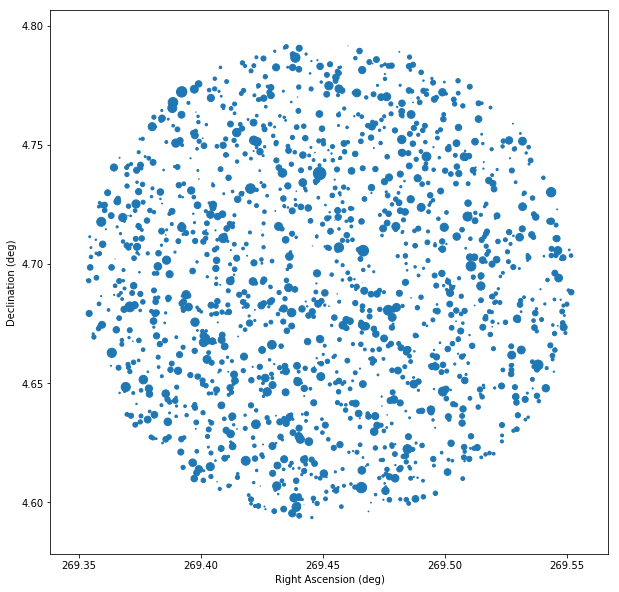

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(p.ra, p.dec, s=rad)
ax.set_xlabel("Right Ascension (deg)")
ax.set_ylabel("Declination (deg)")

The GAIA catalog has a parallax column, `Plx`. 

In [18]:
data["Plx"]

1.5473
-0.3391
-0.9632
0.5543
0.4149
-1.7725
0.4952
0.4355
0.2315
0.5453
0.4441


This column is a `MaskedColumn` in `astropy.Table`, which allows data entries to be missing. See http://docs.astropy.org/en/stable/table/masking.html. You'll also see that some parallax values are negative, which is physically impossible, but an artifact of the GAIA processing of low signal-to-noise objects. 

To convert a `MaskedColumn` to a regular `Column`, we can fill in the values which are missing, like so:

In [19]:
data["Plx"].fill_value = 1e-2 # Some small value
plx = data["Plx"].filled()
plx

1.5473
-0.3391
-0.9632
0.5543
0.4149
-1.7725
0.4952
0.4355
0.2315
0.5453
0.4441


In [20]:
from astropy.coordinates import Distance

In [21]:
Distance?

The `Distance` class of `astropy.coordinates` is a useful way of converting these parallaxes into distances.

Exercise: Use the `Distance` class to convert the GAIA parallax values to distances. Note that `Distance` can not take an `astropy.Column` object, so you can change it to a `Quantity` using `plx.to(plx.unit)`.

In [22]:
print(type(plx))
print(type(plx.to(plx.unit)))

<class 'astropy.table.column.Column'>
<class 'astropy.units.quantity.Quantity'>


In [23]:
d = Distance(parallax=plx.to(plx.unit), allow_negative=True)

/home/bassa/software/anaconda3-2018.12/lib/python3.7/site-packages/astropy/units/equivalencies.py:53: RuntimeWarning: divide by zero encountered in true_divide
  d = 1 / x


## Space motion
Since version 3 of `astropy` it is possible to propagate objects based on their position, distance, proper motion and radial velocity. The GAIA DR2 provides most of this information. The following exercises will show how to do this.

First, let's load the required modules

In [82]:
import numpy as np
from astropy.time import Time

Let's set the epoch of the GAIA DR2 positions.

In [83]:
epoch = Time(2015.5, format="decimalyear")

In [84]:
epoch.isot

'2015-07-02T11:59:59.500'

In [27]:
data[0]

RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,pmRA,e_pmRA,pmDE,e_pmDE,Dup,FG,e_FG,Gmag,e_Gmag,FBP,e_FBP,BPmag,e_BPmag,FRP,e_FRP,RPmag,e_RPmag,BP-RP,RV,e_RV,Teff,AG,E_BP-RP_,Rad,Lum
deg,mas,deg,mas,,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,,e-/s,e-/s,mag,mag,e-/s,e-/s,mag,mag,e-/s,e-/s,mag,mag,mag,km / s,km / s,K,mag,mag,Rsun,Lsun
float64,float64,float64,float64,int64,float64,float32,float64,float32,float64,float32,uint8,float32,float32,float64,float64,float32,float32,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float32,float32,float32,float64
269.49799018493,0.8838,4.60642664546,1.0138,4472795400378951040,1.5473,0.9899,-0.797,1.629,-8.404,1.771,0,114.5,1.459,20.5410,0.0138,58.72,13.18,20.9295,0.2437,90.12,11.14,19.8748,0.1342,1.0547,--,--,--,--,--,--,--


The columns we are interested in are **RA_ICRS** and **DE_ICRS**. We have already defined the distances, so all we need further is **pm_RA**, **pmDE**, and **RV**.

However, we need to clean up some columns, as distances will have NaN values for objects which had negative parallaxes, and not all objects will have radial velocities.

In [50]:
d[np.isnan(d)]=10000*u.pc

In [72]:
data["RV"].fill_value = 0.0*u.km/u.s
rv = data["RV"].filled()

Exercise: Define a 3D position and velocity using `ra`, `dec`, `distance`, `pm_ra_cosdec`, `pm_dec` and `radial_velocity` as inputs to a `SkyCoord` object, defined at a particular time `obstime`.

In [85]:
p = SkyCoord(ra=data["RA_ICRS"], 
             dec=data["DE_ICRS"],
             distance=d, 
             pm_ra_cosdec=data["pmRA"], 
             pm_dec=data["pmDE"],
             radial_velocity=rv,
             obstime=epoch)

In [86]:
p[0]

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (269.49799018, 4.60642665, 646.28708072)
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    (-0.797, -8.404, 0.)>

Exercise: Use the `apply_space_motion` function of a `SkyCoord` object to propagate the position and velocity to another time.

In [88]:
q = p.apply_space_motion(new_obstime=Time("2015-01-01"))

In [89]:
q[0]

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (269.4979903, 4.60642781, 646.28708072)
 (pm_ra, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    (-0.79958275, -8.404, -5.28877439e-07)>

In [31]:
import urllib
import os

In [32]:
url_datafiles = ["ftp://ftp.astron.nl/outgoing/bassa/FORS2.2003-04-11T08%3A49%3A16.002.fits", 
                "ftp://ftp.astron.nl/outgoing/bassa/FORS2.2016-05-16T07%3A29%3A38.764.fits"]
# Download file if it does not exist
for url_datafile in url_datafiles:
    fname = os.path.basename(url_datafile)
    if not os.path.isfile(fname):
        urllib.request.urlretrieve(url_datafile, fname)

In [33]:
from astropy.io import fits

In [34]:
hdu = fits.open("FORS2.2003-04-11T08%3A49%3A16.002.fits")

In [35]:
from astropy.wcs import WCS

In [36]:
from astropy.utils.exceptions import AstropyWarning
import warnings

In [37]:
warnings.filterwarnings("ignore", category=UserWarning, append=True)
warnings.simplefilter("ignore", AstropyWarning)

In [38]:
wcs = WCS(hdu[0].header)

In [39]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 269.452  4.69339  
CRPIX : 1026.5  120.8  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -7.0017e-05  7.0017e-05  
NAXIS : 2048  1034

In [96]:
vimg = hdu[0].data
c = vimg>300
vmin, vmax = np.mean(vimg[c])-2*np.std(vimg[c]), np.mean(vimg[c])+3*np.std(vimg[c])
vmin, vmax = 200, 650

In [ ]:
q = p.apply_space_motion(new_obstime=Time("2015-01-01"))

In [99]:
hdu[0].header["Date-OBS"]

'2003-04-11T08:49:16.001'

/home/bassa/software/anaconda3-2018.12/lib/python3.7/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/home/bassa/software/anaconda3-2018.12/lib/python3.7/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/home/bassa/software/anaconda3-2018.12/lib/python3.7/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


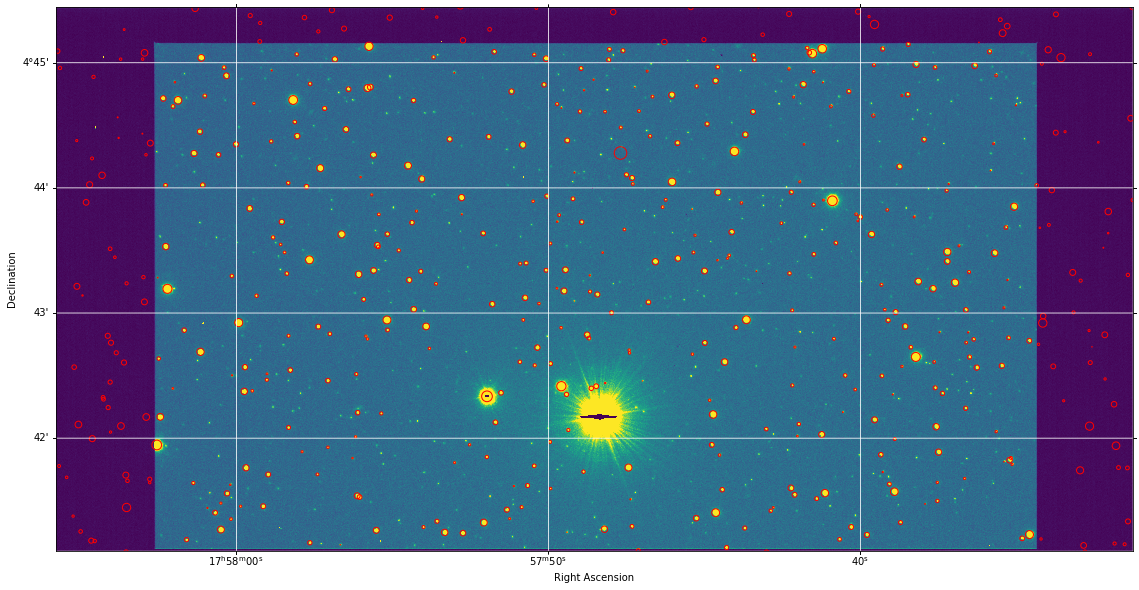

In [97]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection=wcs)
ax.imshow(vimg, vmin=vmin, vmax=vmax, origin="lower", aspect=1, cmap="viridis")
ax.scatter(p.ra, p.dec, s=rad, transform=ax.get_transform("world"), marker="o", color="r", facecolors="None")
ax.grid(color="white")
ax.set_xlim(0, hdu[0].shape[1])
ax.set_ylim(0, hdu[0].shape[0])
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")